In [20]:
import sys
sys.path.append('./include')
from Prob_Coil import ProbCoil
sys.path.append('../bin/Release')
from EMPY_Field import *
sys.path.append('..\include')
from MatrixSolver import MatrixSolver as solver 
cpp_solver="EMPY"
from ngsolve import *
from netgen.occ import *
from netgen.webgui import Draw as DrawGeo
from ngsolve.webgui import Draw

coils = ProbCoil()
a=12.5e-3
b=50e-3
rc=50e-3+a
xb=rc+a
box=Box((0,0,-b),(xb,xb,b))
model=coils.geo*box
model.faces.Min(Y).name="theta0"
model.faces.Min(X).name="thetahalfpi"
geo =OCCGeometry(model)
curveOrder=1
mesh=Mesh (geo.GenerateMesh(maxh=0.25e-2)).Curve(curveOrder) 

Draw(mesh)

B=Bfield(coils.field)
with TaskManager():
    Draw(B,mesh, order=3)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

enter iccg_solve
Dof= 276992    matrix size= 5917428.0
shift parameter= 1.1
minimum residual= 5.962334819574511e-11  at iteraions:  2706


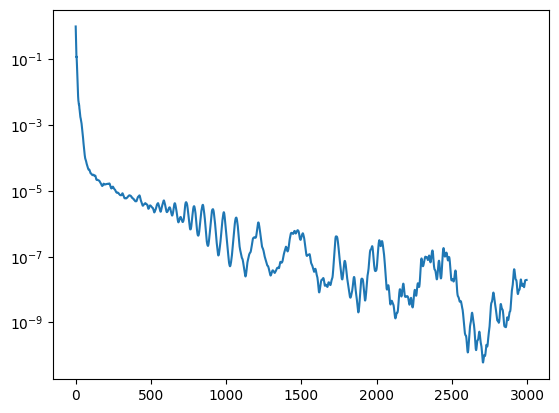

結果のノルム: 6.670020836016054e-09
power=  3.989378368191258e-08


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene

In [21]:
fesOrder=3
fespsi = H1(mesh,  order=fesOrder, dirichlet="dir", complex=False, symmetry=True)
u, N = fespsi.TnT()

gfkai=atan2(y,x)
gradKai=(gfkai.Diff(x), gfkai.Diff(y), 0)
Draw(gfkai, mesh)

gfpsi = GridFunction(fespsi)
a = BilinearForm(fespsi)
a += InnerProduct(Cross(grad(N),gradKai),Cross(grad(u),gradKai))*dx
f = LinearForm(fespsi)
f += InnerProduct(Cross(grad(N),gradKai),B)*dx
a.Assemble()
f.Assemble()

gfpsi=solver.iccg_solve(fespsi, gfpsi, a, f.vec.FV(), tol=1.e-16, max_iter=5000, accel_factor=1.1, 
                         logplot=True, complex=False, cpp_solver=cpp_solver, divfac=100, diviter=100) 

    #gfpsi.vec.data = a.mat.Inverse(fespsi.FreeDofs()) * f.vec
Draw(gfpsi, mesh, order=3)

Order=1 maxh=0.25e-2
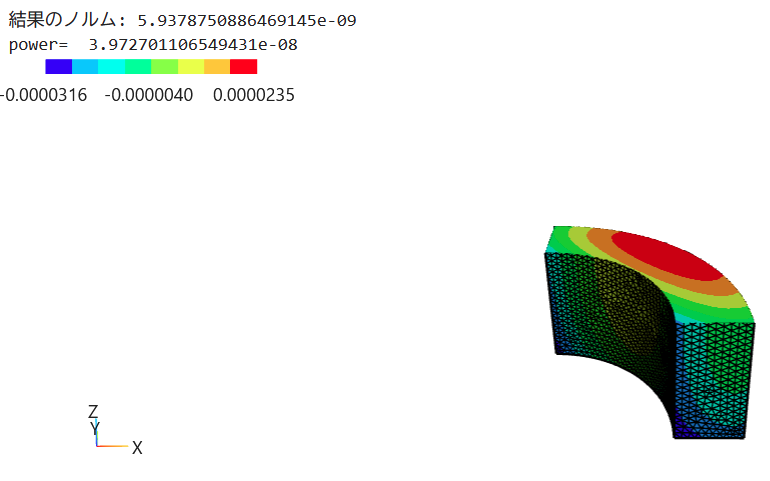

Order=2 maxh=0.25e-2
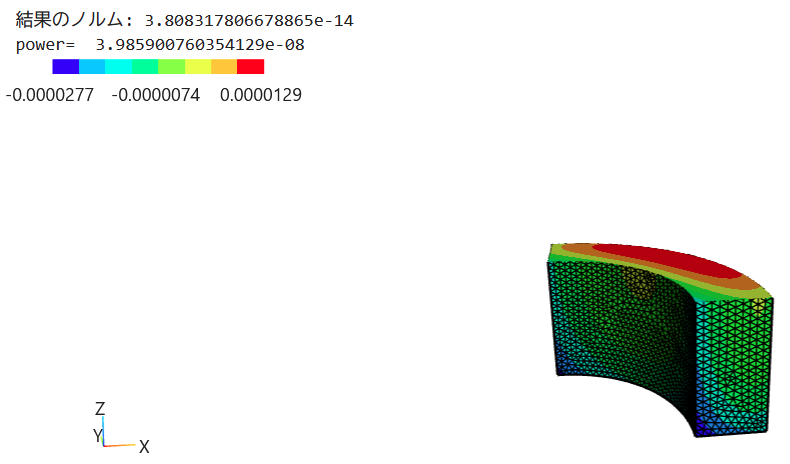

Order=3 maxh=0.25e-2
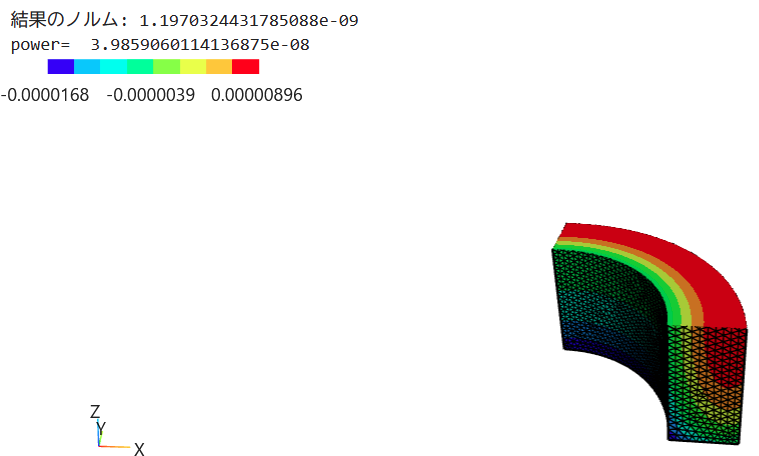

Order=3, curveOrder=1 maxh=0.25e-2
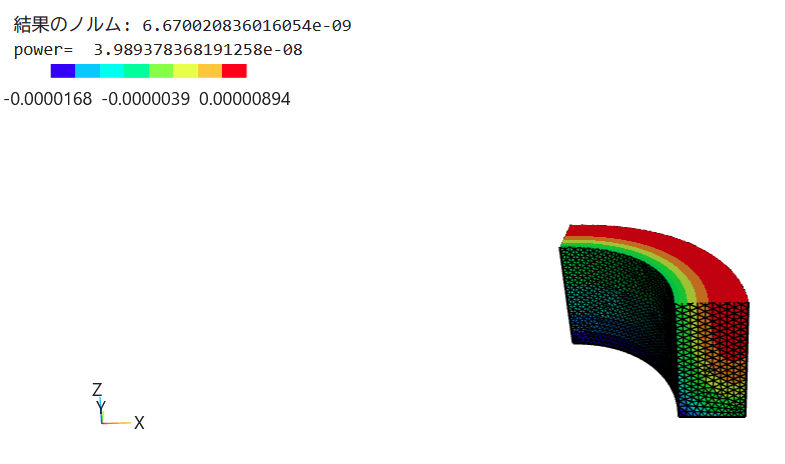

Order=1 maxh=0.125e-2
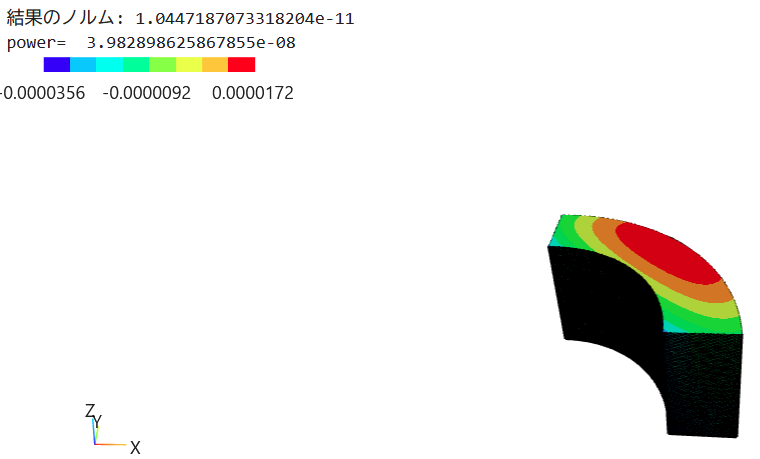

Order=3 maxh=0.5e-2
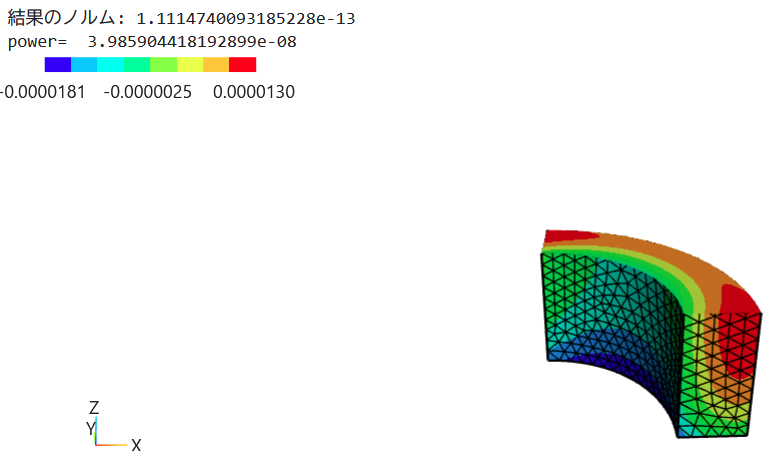